In [6]:
# load in libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load in data for mac
"""
df = pd.read_csv(
    "/Users/robbiei2/Library/CloudStorage/Box-Box/Robbie's Shared Folder/Projects/Seizure Pattern/Data Tables/eeg_in_progress.csv"
)
"""
# load in data for PC
df = pd.read_csv(
    "C:\\Users\\Robbie\\Box\\Robbie's Shared Folder\\Projects\\Seizure Pattern\\Data Tables\\eeg_in_progress.csv"
)
df.sample(10)

,start_year,start_month,start_day,start_hr,start_min,start_sec,end_year,end_month,end_day,end_hr,...,fs,date_analyzed,mouse_id,sex,injection,cycle_group,cycle_stage,computer,channel,date
136282,2019,2,7,9,54,31.1030,2019,2,7,9,...,2000,738700,1079.12 2L,female,KA_left,long,estrus,1,7,2072019
113777,2021,7,25,23,53,10.2790,2021,7,25,23,...,2000,738730,1661.11 L,female,KA_right,long,proestrus,1,7,7252021
137539,2021,7,22,8,57,20.7530,2021,7,22,8,...,2000,738550,1660.21 N,female,KA_right,long,estrus,1,2,7222021
105515,2021,3,5,0,55,2.7435,2021,3,5,0,...,2000,738780,1588.12 L,female,KA_right,long,unlabeled,2,1,3052021
541794,2019,7,1,10,7,34.4590,2019,7,1,10,...,2000,737890,1177.11 L,female,KA_left,regular,diestrus,1,8,7012019
382295,2021,3,13,12,7,18.3170,2021,3,13,12,...,2000,738580,1588.31 R,female,KA_left,regular,diestrus,1,3,3132021
281363,2022,4,4,1,6,18.1830,2022,4,4,1,...,2000,738640,1848.12 no_ear_tag,male,KA_left,NaN,unlabeled,1,5,4042022
188909,2021,3,9,1,58,30.2610,2021,3,9,1,...,2000,738590,1588.11 N,female,KA_right,regular,proestrus,1,8,3092021
235553,2020,11,8,10,54,37.6910,2020,11,8,10,...,2000,738600,1524.13 L+R,female,KA_right,long,diestrus,1,3,11082020
444175,2020,2,7,21,35,51.0480,2020,2,7,21,...,2000,738720,1371.13 L+R,female,KA_right,regular,unlabeled,1,1,2072020


In [7]:
# make datetime column
df["start_datetime"] = pd.to_datetime(
    df["start_year"].astype(str)
    + "-"
    + df["start_month"].astype(str)
    + "-"
    + df["start_day"].astype(str)
    + " "
    + df["start_hr"].astype(str)
    + ":"
    + df["start_min"].astype(str)
    + ":"
    + df["start_sec"].astype(str)
)

df.sample(10)

,start_year,start_month,start_day,start_hr,start_min,start_sec,end_year,end_month,end_day,end_hr,...,date_analyzed,mouse_id,sex,injection,cycle_group,cycle_stage,computer,channel,date,start_datetime
199714,2021,7,19,17,20,23.0370,2021,7,19,17,...,738560,1661.11 L,female,KA_right,long,estrus,1,7,7192021,2021-07-19 17:20:23.037000
338086,2022,4,8,10,48,6.6665,2022,4,8,10,...,738640,1848.14 no_ear_tag,male,KA_left,NaN,unlabeled,1,7,4082022,2022-04-08 10:48:06.666500
400324,2019,5,3,20,37,31.4910,2019,5,3,20,...,738590,1125.41 L,female,KA_left,regular,diestrus,1,2,5032019,2019-05-03 20:37:31.491000
560578,2021,11,20,2,1,32.7500,2021,11,20,2,...,738730,1747.11 no_ear_tag,male,KA_left,NaN,unlabeled,1,1,11202021,2021-11-20 02:01:32.750000
168361,2019,12,13,22,26,3.4210,2019,12,13,22,...,738700,1283.11 N,female,KA_right,regular,proestrus,1,3,12132019,2019-12-13 22:26:03.421000
284084,2021,4,5,5,19,47.8340,2021,4,5,5,...,738570,1589.11 N,female,KA_right,long,diestrus,1,2,4052021,2021-04-05 05:19:47.834000
414662,2021,7,17,2,7,48.6700,2021,7,17,2,...,738560,1665.12 L+R,female,KA_left,long,diestrus,2,2,7172021,2021-07-17 02:07:48.670000
478187,2020,12,15,5,40,36.4660,2020,12,15,5,...,738750,1527.13 R,male,KA_right,NaN,unlabeled,1,7,12152020,2020-12-15 05:40:36.466000
540157,2021,11,29,4,32,25.3730,2021,11,29,4,...,738540,1746.21 no_ear_tag,female,KA_left,long,estrus,1,3,11292021,2021-11-29 04:32:25.373000
110028,2019,3,17,14,11,9.3165,2019,3,17,14,...,738600,1104.21 R,female,KA_left,regular,proestrus,1,3,3172019,2019-03-17 14:11:09.316500


In [39]:
"""
1. partition out days into 1 of 2 groups according to yearly phase of daylight savings 
2. separately convert those 2 groups to ZT time
3. handle overflow for date switched events
4. combine groups
"""

"""
Animal facility light schedule
------------------------------
Spring - Summer
    Lights on @ 5 AM
    Lights off @ 7 PM

Fall - Winter
    Lights on @ 4 AM
    Lights off @ 6 PM

Dates for time change each year 
The time shift begins at 0200 local time on the date of the change
Source: https://aa.usno.navy.mil/data/daylight_time
-------------------------------
2019
Begin: March 10
End: November 3

2020
Begin: March 8
End: November 1

2021
Begin: March 14
End: November 7

2022
Begin: March 13
End: November 6
"""

# get unique years for which to find dates
df["start_year"].unique()

# create year-specific criteria to split dates for ZT conversion
shifted_time = (
    (
        (df["start_datetime"] >= "2019-3-10 02:00:00")
        & (df["start_datetime"] < "2019-11-3 02:00:00")
    )
    | (
        (df["start_datetime"] >= "2020-3-8 02:00:00")
        & (df["start_datetime"] < "2020-11-1 02:00:00")
    )
    | (
        (df["start_datetime"] >= "2021-3-14 02:00:00")
        & (df["start_datetime"] < "2021-11-7 02:00:00")
    )
    | (
        (df["start_datetime"] >= "2022-3-13 02:00:00")
        & (df["start_datetime"] < "2022-11-6 02:00:00")
    )
)

# use criteria to divide up data
spring_summer = df[shifted_time]
fall_winter = df[~shifted_time]

# tag groups for later validation that hr distribution didnt change
spring_summer["time_group"] = "spring_summer"
fall_winter["time_group"] = "fall_winter"

C:\Users\Robbie\AppData\Local\Temp\ipykernel_1932\2498860081.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spring_summer["time_group"] = "spring_summer"
C:\Users\Robbie\AppData\Local\Temp\ipykernel_1932\2498860081.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fall_winter["time_group"] = "fall_winter"


In [40]:
# check that all rows from the original dataframe are accounted for and that correct dates exist within each subset
len(spring_summer) + len(fall_winter) == len(df)

print(
    "spring_summer months: ",
    sorted(spring_summer["start_month"].unique()),
    "\nfall_winter months: ",
    sorted(fall_winter["start_month"].unique()),
    "\noriginal df months: ",
    sorted(df["start_month"].unique()),
)

# seems pretty sus that there is no data for the months of september or october.
# however, i checked the original data and confirmed that no animals were recorded in those months

spring_summer months:  [3, 4, 5, 6, 7, 8] 
fall_winter months:  [1, 2, 3, 11, 12] 
original df months:  [1, 2, 3, 4, 5, 6, 7, 8, 11, 12]


(array([11787., 11798., 13263., 12794., 10568.,  8931.,  8794.,  8530.,
         8165.,  8080.,  8811.,  8474.,  8377.,  8516.,  7948.,  8279.,
         8148.,  8184., 11267., 12599., 12606., 12534., 12266., 11551.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

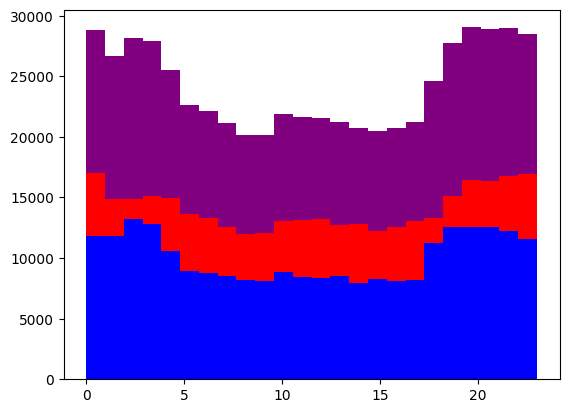

In [41]:
# inspect distribution of hours to ensure that seizures are not being dropped
# near cutoff times for daylight savings correction
plt.hist(df["start_hr"], bins=24, color="purple")
plt.hist(spring_summer["start_hr"], bins=24, color="red")
plt.hist(fall_winter["start_hr"], bins=24, color="blue")

In [42]:
# correct for daylight savings time in the spring_summer months and combine dfs
spring_summer = spring_summer.copy()
spring_summer["corrected_start_datetime"] = spring_summer[
    "start_datetime"
] + pd.Timedelta(hours=1)

fall_winter = fall_winter.copy()
fall_winter["corrected_start_datetime"] = fall_winter["start_datetime"]

dfs = [spring_summer, fall_winter]

df_adjusted = pd.concat(dfs)
df_adjusted.sample(10)

,start_year,start_month,start_day,start_hr,start_min,start_sec,end_year,end_month,end_day,end_hr,...,sex,injection,cycle_group,cycle_stage,computer,channel,date,start_datetime,time_group,corrected_start_datetime
118938,2020,1,24,0,46,2.0510,2020,1,24,0,...,female,KA_right,regular,diestrus,1,1,1242020,2020-01-24 00:46:02.051000,fall_winter,2020-01-24 00:46:02.051000
70483,2021,11,13,21,48,35.8850,2021,11,13,21,...,male,KA_left,NaN,unlabeled,1,1,11132021,2021-11-13 21:48:35.885000,fall_winter,2021-11-13 21:48:35.885000
43028,2021,3,12,18,49,35.9750,2021,3,12,18,...,female,KA_right,regular,diestrus,1,8,3122021,2021-03-12 18:49:35.975000,fall_winter,2021-03-12 18:49:35.975000
43975,2021,4,8,6,24,15.4260,2021,4,8,6,...,female,KA_left,regular,proestrus,1,4,4082021,2021-04-08 06:24:15.426000,spring_summer,2021-04-08 07:24:15.426000
174697,2019,7,4,19,26,59.4330,2019,7,4,19,...,female,KA_left,regular,unlabeled,1,8,7042019,2019-07-04 19:26:59.433000,spring_summer,2019-07-04 20:26:59.433000
514308,2021,11,20,19,42,55.6530,2021,11,20,19,...,female,KA_right,regular,estrus,1,2,11202021,2021-11-20 19:42:55.653000,fall_winter,2021-11-20 19:42:55.653000
116842,2021,7,16,9,8,9.5285,2021,7,16,9,...,female,KA_right,long,unlabeled,1,1,7162021,2021-07-16 09:08:09.528500,spring_summer,2021-07-16 10:08:09.528500
39813,2021,7,21,8,54,44.0700,2021,7,21,8,...,female,KA_right,long,proestrus,1,2,7212021,2021-07-21 08:54:44.070000,spring_summer,2021-07-21 09:54:44.070000
352571,2020,12,16,11,9,1.7945,2020,12,16,11,...,male,KA_right,NaN,unlabeled,1,6,12162020,2020-12-16 11:09:01.794500,fall_winter,2020-12-16 11:09:01.794500
50696,2019,2,14,3,36,54.9910,2019,2,14,3,...,female,KA_left,long,estrus,1,6,2142019,2019-02-14 03:36:54.991000,fall_winter,2019-02-14 03:36:54.991000


In [43]:
df_adjusted["corrected_start_date"] = df_adjusted[
    "corrected_start_datetime"
].dt.date.astype(str)
df_adjusted["corrected_start_hour"] = df_adjusted[
    "corrected_start_datetime"
].dt.hour.astype(int)
df_adjusted.sample(10)

# quality checks
# df_adjusted['corrected_start_hour'].isnull().sum()
# df_adjusted['corrected_start_date'].isnull().sum()

,start_year,start_month,start_day,start_hr,start_min,start_sec,end_year,end_month,end_day,end_hr,...,cycle_group,cycle_stage,computer,channel,date,start_datetime,time_group,corrected_start_datetime,corrected_start_date,corrected_start_hour
257234,2019,2,8,2,19,48.076,2019,2,8,2,...,long,proestrus,2,1,2082019,2019-02-08 02:19:48.076,fall_winter,2019-02-08 02:19:48.076,2019-02-08,2
209111,2021,3,10,19,49,49.385,2021,3,10,19,...,regular,estrus,1,8,3102021,2021-03-10 19:49:49.385,fall_winter,2021-03-10 19:49:49.385,2021-03-10,19
178642,2019,8,24,0,46,41.814,2019,8,24,0,...,regular,estrus,1,5,8232019,2019-08-24 00:46:41.814,spring_summer,2019-08-24 01:46:41.814,2019-08-24,1
355133,2019,2,3,22,53,0.493,2019,2,3,22,...,regular,unlabeled,1,8,2032019,2019-02-03 22:53:00.493,fall_winter,2019-02-03 22:53:00.493,2019-02-03,22
529775,2019,2,15,22,29,45.502,2019,2,15,22,...,regular,estrus,1,8,2152019,2019-02-15 22:29:45.502,fall_winter,2019-02-15 22:29:45.502,2019-02-15,22
569584,2021,11,23,6,40,49.103,2021,11,23,6,...,long,estrus,1,3,11232021,2021-11-23 06:40:49.103,fall_winter,2021-11-23 06:40:49.103,2021-11-23,6
555815,2020,1,28,4,9,52.756,2020,1,28,4,...,regular,unlabeled,1,1,1282020,2020-01-28 04:09:52.756,fall_winter,2020-01-28 04:09:52.756,2020-01-28,4
152229,2021,7,15,17,6,40.129,2021,7,15,17,...,regular,diestrus,2,3,7152021,2021-07-15 17:06:40.129,spring_summer,2021-07-15 18:06:40.129,2021-07-15,18
515818,2020,11,9,19,59,19.419,2020,11,9,19,...,regular,diestrus,1,1,11092020,2020-11-09 19:59:19.419,fall_winter,2020-11-09 19:59:19.419,2020-11-09,19
226631,2021,3,10,5,8,48.967,2021,3,10,5,...,long,diestrus,2,1,3102021,2021-03-10 05:08:48.967,fall_winter,2021-03-10 05:08:48.967,2021-03-10,5


c:\Users\Robbie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


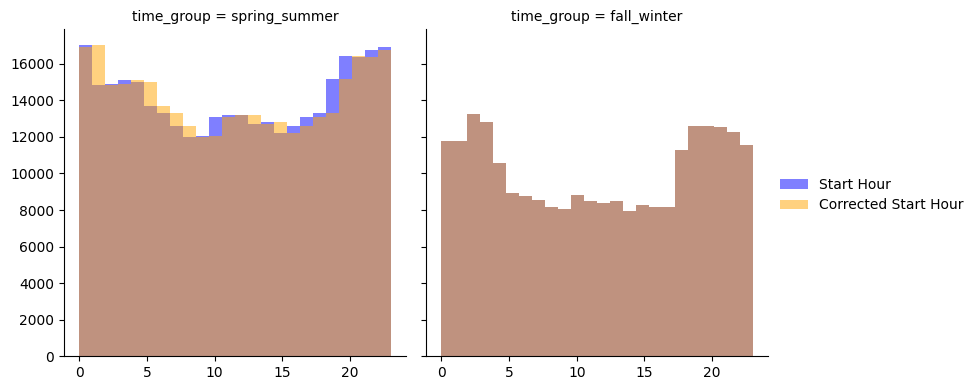

In [54]:
# inspect distribution of hours to ensure that seizures are not being dropped
# near cutoff times for daylight savings correction


# Define a custom plotting function to plot both histograms on the same axes
def plot_histograms(data, **kwargs):
    plt.hist(data["start_hr"], bins=24, alpha=0.5, label="Start Hour", color="blue")
    plt.hist(
        data["corrected_start_hour"],
        bins=24,
        alpha=0.5,
        label="Corrected Start Hour",
        color="orange",
    )


# Create a FacetGrid with 'time_group' as the col parameter
plot = sns.FacetGrid(df_adjusted, col="time_group", height=4)

# Map the custom plotting function to the FacetGrid
plot.map_dataframe(plot_histograms)

# Add a legend to differentiate between 'start_hr' and 'corrected_start_hour'
plot.add_legend()

plt.show()

In [58]:
# convert corrected start hr to ZT
df_adjusted["corrected_start_hr_zt"] = (df_adjusted["corrected_start_hour"] + 6) % 24
df_adjusted.sample(10)

,start_year,start_month,start_day,start_hr,start_min,start_sec,end_year,end_month,end_day,end_hr,...,cycle_stage,computer,channel,date,start_datetime,time_group,corrected_start_datetime,corrected_start_date,corrected_start_hour,corrected_start_hr_zt
113303,2021,7,25,18,47,31.4180,2021,7,25,18,...,proestrus,1,7,7252021,2021-07-25 18:47:31.418000,spring_summer,2021-07-25 19:47:31.418000,2021-07-25,19,1
81323,2021,7,30,18,25,36.6560,2021,7,30,18,...,estrus,1,2,7302021,2021-07-30 18:25:36.656000,spring_summer,2021-07-30 19:25:36.656000,2021-07-30,19,1
117583,2021,4,1,2,38,26.0010,2021,4,1,2,...,estrus,1,1,4012021,2021-04-01 02:38:26.001000,spring_summer,2021-04-01 03:38:26.001000,2021-04-01,3,9
542105,2019,7,1,17,58,11.6490,2019,7,1,17,...,diestrus,1,8,7012019,2019-07-01 17:58:11.649000,spring_summer,2019-07-01 18:58:11.649000,2019-07-01,18,0
161119,2020,1,19,0,47,3.6515,2020,1,19,0,...,diestrus,1,1,1192020,2020-01-19 00:47:03.651500,fall_winter,2020-01-19 00:47:03.651500,2020-01-19,0,6
409867,2019,5,2,4,36,59.1670,2019,5,2,4,...,unlabeled,1,2,5022019,2019-05-02 04:36:59.167000,spring_summer,2019-05-02 05:36:59.167000,2019-05-02,5,11
45220,2021,4,4,1,56,51.8500,2021,4,4,1,...,unlabeled,1,8,4042021,2021-04-04 01:56:51.850000,spring_summer,2021-04-04 02:56:51.850000,2021-04-04,2,8
569955,2021,11,23,20,33,41.5200,2021,11,23,20,...,estrus,1,3,11232021,2021-11-23 20:33:41.520000,fall_winter,2021-11-23 20:33:41.520000,2021-11-23,20,2
96125,2021,7,16,12,31,49.5870,2021,7,16,12,...,unlabeled,1,3,7162021,2021-07-16 12:31:49.587000,spring_summer,2021-07-16 13:31:49.587000,2021-07-16,13,19
477700,2021,7,16,20,48,8.3440,2021,7,16,20,...,diestrus,1,4,7162021,2021-07-16 20:48:08.344000,spring_summer,2021-07-16 21:48:08.344000,2021-07-16,21,3


In [61]:
# make datetime column for daylight savings & zt time
df_adjusted["start_datetime_zt"] = pd.to_datetime(
    df_adjusted["corrected_start_date"].astype(str)
    + " "
    + df_adjusted["corrected_start_hr_zt"].astype(str)
    + ":"
    + df_adjusted["start_min"].astype(str)
    + ":"
    + df_adjusted["start_sec"].astype(str)
)

df_adjusted.sample(10)

,start_year,start_month,start_day,start_hr,start_min,start_sec,end_year,end_month,end_day,end_hr,...,computer,channel,date,start_datetime,time_group,corrected_start_datetime,corrected_start_date,corrected_start_hour,corrected_start_hr_zt,start_datetime_zt
44927,2021,4,8,23,24,12.474,2021,4,8,23,...,1,4,4082021,2021-04-08 23:24:12.474,spring_summer,2021-04-09 00:24:12.474,2021-04-09,0,6,2021-04-09 06:24:12.474
410909,2021,7,15,1,44,58.870,2021,7,15,1,...,1,3,7152021,2021-07-15 01:44:58.870,spring_summer,2021-07-15 02:44:58.870,2021-07-15,2,8,2021-07-15 08:44:58.870
223956,2019,5,5,11,6,22.171,2019,5,5,11,...,1,2,5052019,2019-05-05 11:06:22.171,spring_summer,2019-05-05 12:06:22.171,2019-05-05,12,18,2019-05-05 18:06:22.171
561490,2021,11,20,17,59,52.221,2021,11,20,18,...,1,1,11202021,2021-11-20 17:59:52.221,fall_winter,2021-11-20 17:59:52.221,2021-11-20,17,23,2021-11-20 23:59:52.221
151706,2021,7,15,8,49,4.066,2021,7,15,8,...,2,3,7152021,2021-07-15 08:49:04.066,spring_summer,2021-07-15 09:49:04.066,2021-07-15,9,15,2021-07-15 15:49:04.066
5581,2021,7,18,9,46,58.764,2021,7,18,9,...,1,3,7182021,2021-07-18 09:46:58.764,spring_summer,2021-07-18 10:46:58.764,2021-07-18,10,16,2021-07-18 16:46:58.764
458579,2022,4,7,8,5,51.457,2022,4,7,8,...,1,1,4072022,2022-04-07 08:05:51.457,spring_summer,2022-04-07 09:05:51.457,2022-04-07,9,15,2022-04-07 15:05:51.457
407243,2019,8,12,19,20,30.612,2019,8,12,19,...,1,5,8122019,2019-08-12 19:20:30.612,spring_summer,2019-08-12 20:20:30.612,2019-08-12,20,2,2019-08-12 02:20:30.612
113762,2021,7,25,23,48,13.279,2021,7,25,23,...,1,7,7252021,2021-07-25 23:48:13.279,spring_summer,2021-07-26 00:48:13.279,2021-07-26,0,6,2021-07-26 06:48:13.279
426044,2021,4,6,18,14,48.922,2021,4,6,18,...,2,1,4062021,2021-04-06 18:14:48.922,spring_summer,2021-04-06 19:14:48.922,2021-04-06,19,1,2021-04-06 01:14:48.922


In [64]:
# rename certain columns I intend to keep
df_adjusted.rename(
    columns={
        "corrected_start_datetime": "start_datetime_24_hr",
        "start_datetime_zt": "start_datetime_zt_hr",
    }
)

# clean up unneeded columns
df_adjusted.columns.tolist()
cols = [
    "mouse_id",
    "sex",
    "injection",
    "cycle_group",
    "cycle_stage",
    "start_datetime",
    "start_datetime_zt",
    "duration_sec",
    "positive_spike_count",
    "negative_spike_count",
    "positive_w_spike_count",
    "negative_w_spike_count",
    "positive_n_spike_count",
    "negative_n_spike_count",
    "average_positive_width",
    "average_negative_width",
    "percent_positive_n_spikes",
    "percent_negative_n_spikes",
    "positive_n_spikes_per_sec",
    "negative_n_spikes_per_sec",
    "positive_spikes_per_sec",
    "negative_spikes_per_sec",
]

df_zt_conversion = df_adjusted[cols]
df_zt_conversion.sample(10)

,mouse_id,sex,injection,cycle_group,cycle_stage,start_datetime,start_datetime_zt,duration_sec,positive_spike_count,negative_spike_count,...,positive_n_spike_count,negative_n_spike_count,average_positive_width,average_negative_width,percent_positive_n_spikes,percent_negative_n_spikes,positive_n_spikes_per_sec,negative_n_spikes_per_sec,positive_spikes_per_sec,negative_spikes_per_sec
510628,1079.21 N,female,KA_left,long,diestrus,2019-02-02 09:56:09.150,2019-02-02 15:56:09.150,169.9500,669,700,...,662,692,0.016735,0.017024,0.98954,0.98857,3.8953,4.0719,3.9365,4.1189
491316,1177.11 L,female,KA_left,regular,estrus,2019-07-05 18:00:10.800,2019-07-05 01:00:10.800,333.9700,2369,2803,...,2368,2803,0.011620,0.011250,0.99958,1.00000,7.0904,8.3929,7.0934,8.3929
403384,1661.12 R,female,KA_right,long,diestrus,2021-07-17 19:30:01.214,2021-07-17 02:30:01.214,12.3030,18,25,...,18,25,0.010444,0.007440,1.00000,1.00000,1.4631,2.0320,1.4631,2.0320
534928,1746.21 no_ear_tag,female,KA_left,long,diestrus,2021-11-18 04:04:55.059,2021-11-18 10:04:55.059,14.3410,43,48,...,43,47,0.017814,0.019260,1.00000,0.97917,2.9985,3.2774,2.9985,3.3472
213648,1125.41 L,female,KA_left,regular,unlabeled,2019-05-04 04:56:23.003,2019-05-04 11:56:23.003,6.0000,34,46,...,30,34,0.047412,0.107660,0.88235,0.73913,5.0000,5.6667,5.6667,7.6667
555816,1371.13 L+R,female,KA_right,regular,unlabeled,2020-01-28 04:11:48.004,2020-01-28 10:11:48.004,21.6150,93,108,...,91,102,0.023704,0.027366,0.97849,0.94444,4.2099,4.7188,4.3025,4.9964
441699,1665.12 L+R,female,KA_left,long,diestrus,2021-07-16 23:05:35.975,2021-07-17 06:05:35.975,27.7000,111,51,...,111,51,0.015838,0.012637,1.00000,1.00000,4.0072,1.8412,4.0072,1.8412
426050,1608.13 R,male,KA_left,NaN,unlabeled,2021-04-06 18:31:19.412,2021-04-06 01:31:19.412,11.0970,29,36,...,29,36,0.015155,0.016389,1.00000,1.00000,2.6133,3.2441,2.6133,3.2441
570002,1746.21 no_ear_tag,female,KA_left,long,estrus,2021-11-23 21:13:53.872,2021-11-23 03:13:53.872,7.4485,30,29,...,18,15,0.077017,0.052500,0.60000,0.51724,2.4166,2.0138,4.0277,3.8934
446464,1105.21 N,female,KA_left,regular,estrus,2019-03-20 13:55:28.748,2019-03-20 20:55:28.748,5.7210,0,12,...,0,12,0.000000,0.011333,NaN,1.00000,0.0000,2.0975,0.0000,2.0975


In [65]:
# write corrected_df to csv file
df_zt_conversion.to_csv(
    "C:\\Users\\Robbie\\Box\\Robbie's Shared Folder\\Projects\\Seizure Pattern\\Data Tables\\df_time_corrected.csv",
    index=False,
)